In [35]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv("Cricket_Sim/IPL_DATA_BALL_modified.csv")
raw_data = raw_data.drop(['Unnamed: 0'], axis = 1)
raw_data

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,wickets_till_now,runs_till_now,ball#
0,335982,1,0,1,SC Ganguly,BB McCullum,P Kumar,0,1,1,...,0,NaN,NaN,NaN,legbyes,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1
1,335982,1,0,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,...,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,2
2,335982,1,0,3,BB McCullum,SC Ganguly,P Kumar,0,1,1,...,0,NaN,NaN,NaN,wides,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,3
3,335982,1,0,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,...,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,4
4,335982,1,0,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,...,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,2,17,6,HH Pandya,Ishan Kishan,K Rabada,1,0,1,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,4,154,108
193464,1237181,2,18,1,HH Pandya,Ishan Kishan,A Nortje,1,0,1,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,4,155,109
193465,1237181,2,18,2,Ishan Kishan,HH Pandya,A Nortje,1,0,1,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,4,156,110
193466,1237181,2,18,3,HH Pandya,Ishan Kishan,A Nortje,0,0,0,...,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,5,156,111


In [3]:
summary_table = raw_data.groupby(['id', 'inning']).max()
summary_table

C:\Users\D T Home\AppData\Local\Temp\ipykernel_11644\4161555617.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  summary_table = raw_data.groupby(['id', 'inning']).max()


over  ball         batsman     non_striker       bowler  \
id      inning                                                            
335982  1         19     7      SC Ganguly      SC Ganguly       Z Khan   
        2         15     8          Z Khan          Z Khan   SC Ganguly   
335983  1         19     8        SK Raina        SK Raina      WA Mota   
        2         19     8    Yuvraj Singh    Yuvraj Singh   P Amarnath   
335984  1         19     7       YK Pathan       YK Pathan     R Bhatia   
...              ...   ...             ...             ...          ...   
1237178 2         19     8      SP Goswami      SP Goswami    YS Chahal   
1237180 1         19     7         SS Iyer         SS Iyer  T Natarajan   
        2         19     8  Sandeep Sharma  Sandeep Sharma     R Ashwin   
1237181 1         19     7         SS Iyer         SS Iyer     TA Boult   
        2         18     6        SA Yadav        SA Yadav     R Ashwin   

                batsman_runs  extra_runs  total_runs  non_boundary  is_wicket  \
id      inning                                                                  
335982  1                  6           5           6             0          1   
        2                  6           4           6             0          1   
335983  1                  6           1           6             0          1   
        2                  6           2           6             0          1   
335984  1                  6           2           6             0          1   
...                      ...         ...         ...           ...        ...   
1237178 2                  6           4           6             0          1   
1237180 1                  6           1           6             1          1   
        2                  6           1           6             0          1   
1237181 1                  6           1           6             0          1   
        2                  6           4           6             0          1   

                               batting_team                 bowling_team  \
id      inning                                                             
335982  1             Kolkata Knight Riders  Royal Challengers Bangalore   
        2       Royal Challengers Bangalore        Kolkata Knight Riders   
335983  1               Chennai Super Kings              Kings XI Punjab   
        2                   Kings XI Punjab          Chennai Super Kings   
335984  1                  Rajasthan Royals             Delhi Daredevils   
...                                     ...                          ...   
1237178 2               Sunrisers Hyderabad  Royal Challengers Bangalore   
1237180 1                    Delhi Capitals          Sunrisers Hyderabad   
        2               Sunrisers Hyderabad               Delhi Capitals   
1237181 1                    Delhi Capitals               Mumbai Indians   
        2                    Mumbai Indians               Delhi Capitals   

                wickets_till_now  runs_till_now  ball#  
id      inning                                          
335982  1                      3            222    124  
        2                     10             82    101  
335983  1                      5            240    124  
        2                      4            207    124  
335984  1                      8            129    122  
...                          ...            ...    ...  
1237178 2                      4            132    123  
1237180 1                      3            189    125  
        2                      8            172    125  
1237181 1                      7            156    123  
        2                      5            157    112  

[1630 rows x 15 columns]

In [4]:
summary_table['runs_till_now'][(335983,1)]

240

In [5]:
raw_data['final_score'] = 0

In [6]:
for i in range(raw_data.shape[0]):
    raw_data['final_score'][i] = summary_table['runs_till_now'][(raw_data['id'][i],raw_data['inning'][i])]

C:\Users\D T Home\AppData\Local\Temp\ipykernel_11644\1856640616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['final_score'][i] = summary_table['runs_till_now'][(raw_data['id'][i],raw_data['inning'][i])]


In [7]:
raw_data

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,wickets_till_now,runs_till_now,ball#,final_score
0,335982,1,0,1,SC Ganguly,BB McCullum,P Kumar,0,1,1,...,NaN,NaN,NaN,legbyes,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,222
1,335982,1,0,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,...,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,2,222
2,335982,1,0,3,BB McCullum,SC Ganguly,P Kumar,0,1,1,...,NaN,NaN,NaN,wides,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,3,222
3,335982,1,0,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,...,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,4,222
4,335982,1,0,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,...,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,5,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,2,17,6,HH Pandya,Ishan Kishan,K Rabada,1,0,1,...,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,4,154,108,157
193464,1237181,2,18,1,HH Pandya,Ishan Kishan,A Nortje,1,0,1,...,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,4,155,109,157
193465,1237181,2,18,2,Ishan Kishan,HH Pandya,A Nortje,1,0,1,...,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,4,156,110,157
193466,1237181,2,18,3,HH Pandya,Ishan Kishan,A Nortje,0,0,0,...,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,5,156,111,157


In [8]:
raw_data.columns.values

array(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary',
       'is_wicket', 'dismissal_kind', 'player_dismissed', 'fielder',
       'extras_type', 'batting_team', 'bowling_team', 'wickets_till_now',
       'runs_till_now', 'ball#', 'final_score'], dtype=object)

In [11]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [9]:
df = raw_data.copy()
columns_reqd = ['inning', 'ball#', 'runs_till_now', 'wickets_till_now', 'batting_team', 'bowling_team', 'final_score']
df = df[columns_reqd]

In [12]:
df 

,inning,ball#,runs_till_now,wickets_till_now,batting_team,bowling_team,final_score
0,1,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,222
1,1,2,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,222
2,1,3,2,0,Kolkata Knight Riders,Royal Challengers Bangalore,222
3,1,4,2,0,Kolkata Knight Riders,Royal Challengers Bangalore,222
4,1,5,2,0,Kolkata Knight Riders,Royal Challengers Bangalore,222
...,...,...,...,...,...,...,...
193463,2,108,154,4,Mumbai Indians,Delhi Capitals,157
193464,2,109,155,4,Mumbai Indians,Delhi Capitals,157
193465,2,110,156,4,Mumbai Indians,Delhi Capitals,157
193466,2,111,156,5,Mumbai Indians,Delhi Capitals,157


In [21]:
raw_data['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [15]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
df = df[(df['batting_team'].isin(consistent_teams)) & (df['bowling_team'].isin(consistent_teams))]

In [16]:
df = df[df['ball#']>=30]

In [23]:
df

,inning,ball#,runs_till_now,wickets_till_now,batting_team,bowling_team,final_score
29,1,30,59,0,Kolkata Knight Riders,Royal Challengers Bangalore,222
30,1,31,60,0,Kolkata Knight Riders,Royal Challengers Bangalore,222
31,1,32,60,0,Kolkata Knight Riders,Royal Challengers Bangalore,222
32,1,33,61,0,Kolkata Knight Riders,Royal Challengers Bangalore,222
33,1,34,61,1,Kolkata Knight Riders,Royal Challengers Bangalore,222
...,...,...,...,...,...,...,...
192978,2,119,123,4,Sunrisers Hyderabad,Royal Challengers Bangalore,132
192979,2,120,124,4,Sunrisers Hyderabad,Royal Challengers Bangalore,132
192980,2,121,124,4,Sunrisers Hyderabad,Royal Challengers Bangalore,132
192981,2,122,128,4,Sunrisers Hyderabad,Royal Challengers Bangalore,132


In [24]:
encoded_df = pd.get_dummies(data=df, columns=['batting_team', 'bowling_team'])

In [25]:
encoded_df

,inning,ball#,runs_till_now,wickets_till_now,final_score,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
29,1,30,59,0,222,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
30,1,31,60,0,222,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
31,1,32,60,0,222,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
32,1,33,61,0,222,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
33,1,34,61,1,222,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192978,2,119,123,4,132,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
192979,2,120,124,4,132,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
192980,2,121,124,4,132,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
192981,2,122,128,4,132,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [87]:
X = encoded_df.drop(labels='final_score', axis=1)
y = encoded_df['final_score']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Multiple Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = regressor.predict(X_test)

In [102]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.5361024242525683

C:\Users\D T Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Difference in predicted and actual'), Text(0, 0.5, 'density')]

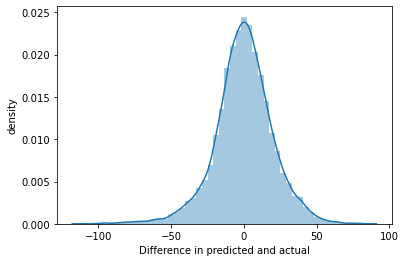

In [103]:
import seaborn as sns
fig = sns.distplot(y_test-y_pred)
fig.set(xlabel = 'Difference in predicted and actual',ylabel =  'density')

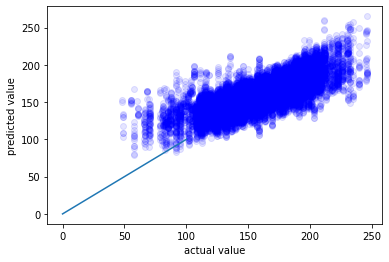

In [104]:
plt.scatter(y_test, y_pred, c ="blue", alpha = 0.1)
x = np.linspace(0,100,100)
plt.plot(x,x)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show()

### Lasso Regression

In [47]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [48]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\D T Home\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.02092e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\D T Home\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.28738e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\D T Home\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.40278e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\D T Home\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.18227e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\D T Home\anaconda3\lib\site-packages\sklearn\linear_model\_ridg

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [49]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-400.8940576266994


In [50]:
y_pred =ridge_regressor.predict(X_test)

In [52]:
r2_score(y_test, y_pred)

0.5361105941012685

C:\Users\D T Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Difference in predicted and actual'), Text(0, 0.5, 'density')]

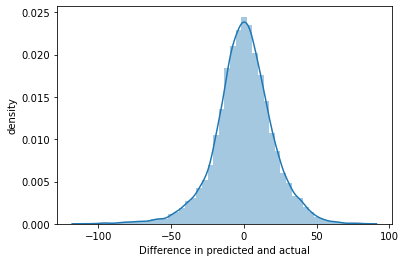

In [51]:
fig = sns.distplot(y_test-y_pred)
fig.set(xlabel = 'Difference in predicted and actual',ylabel =  'density')

In [54]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 14.940195203183118
MSE: 400.3775446126106
RMSE: 20.009436389179246


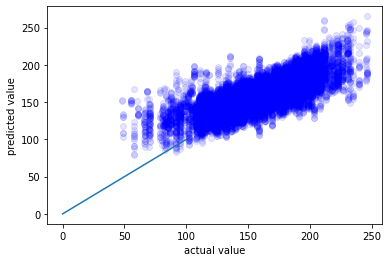

In [55]:
plt.scatter(y_test, y_pred, c ="blue", alpha = 0.1)
x = np.linspace(0,100,100)
plt.plot(x,x)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show()

### Decision Tree Regression

In [89]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
#seed value so as to have consistent results
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [90]:
y_pred = regressor.predict(X_test)
y_pred

array([132., 166., 187., ..., 196., 181., 175.])

In [91]:
r2_score(y_test, y_pred)

0.6895259390158832

C:\Users\D T Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Difference in predicted and actual'), Text(0, 0.5, 'density')]

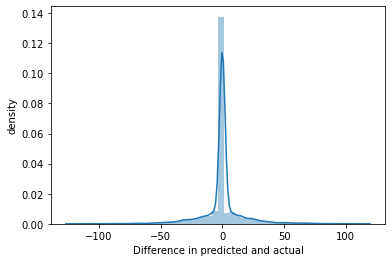

In [92]:
fig = sns.distplot(y_test-y_pred)
fig.set(xlabel = 'Difference in predicted and actual',ylabel =  'density')

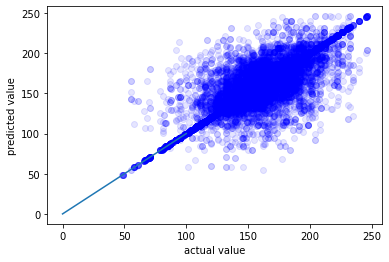

In [93]:
plt.scatter(y_test, y_pred, c ="blue", alpha = 0.1)
x = np.linspace(0,100,100)
plt.plot(x,x)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show()

### Random Forest Regression

In [94]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [95]:
y_pred = regressor.predict(X_test)
y_pred

array([132. , 158. , 160.9, ..., 195.8, 148.5, 181.4])

In [96]:
r2_score(y_test, y_pred)

0.8152253709564292

C:\Users\D T Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Difference in predicted and actual'), Text(0, 0.5, 'density')]

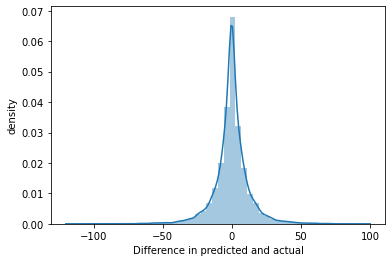

In [97]:
fig = sns.distplot(y_test-y_pred)
fig.set(xlabel = 'Difference in predicted and actual',ylabel =  'density')

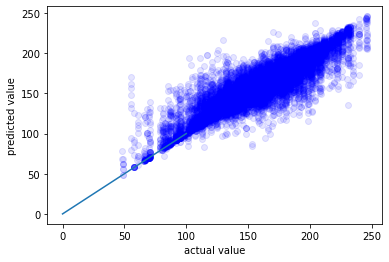

In [98]:
plt.scatter(y_test, y_pred, c ="blue", alpha = 0.1)
x = np.linspace(0,100,100)
plt.plot(x,x)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show()

In [105]:
X.columns.values

array(['inning', 'ball#', 'runs_till_now', 'wickets_till_now',
       'batting_team_Chennai Super Kings',
       'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
       'batting_team_Kolkata Knight Riders',
       'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad',
       'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
       'bowling_team_Kolkata Knight Riders',
       'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad'], dtype=object)

In [109]:
#Innings 1, 60th ball, 100 runs scored for 2 wickets, CSK batting agains MI gives the following prediction
regressor.predict([[1,60,100,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]])[0]

193.09246587291267

### SVM Regression

### Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_columns = X_train.columns.values

In [63]:
X_train = sc_X.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_columns)
X_test = sc_X.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_columns)

In [72]:
y_train = y_train.transpose()
y_test = y_test.transpose()

In [73]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\D T Home\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [74]:
y_pred

array([151.20332187, 151.2134214 , 159.32391182, ..., 187.53303307,
       128.2300415 , 176.69854125])

In [78]:
r2_score(y_test, y_pred)

0.5361105941012685

C:\Users\D T Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Difference in predicted and actual'), Text(0, 0.5, 'density')]

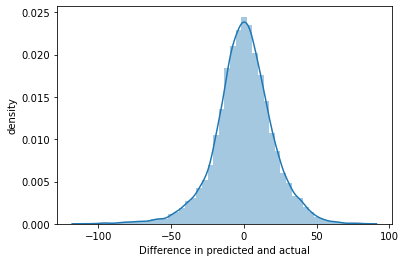

In [81]:
fig = sns.distplot(y_test-y_pred)
fig.set(xlabel = 'Difference in predicted and actual',ylabel =  'density')

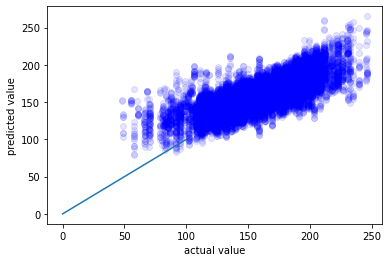

In [80]:
plt.scatter(y_test, y_pred, c ="blue", alpha = 0.1)
x = np.linspace(0,100,100)
plt.plot(x,x)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show()